In [26]:
import pandas as pd
from IPython.display import display

In [27]:
df_cidade = pd.read_csv("Clima__50_mil_linhas.csv", sep=",", encoding="utf-8")

In [28]:
# Exibir as 5 primeiras linhas em formato de tabela amigável
display(df_cidade.head(5))

,time,cidade,regiao,temp_c,feelslike_c,humidity,precip_mm,wind_kph,pressure_mb,uv,vis_km,condicao,is_day
0,2025-01-01 00:00:00,Manaus,Sul,27.0,20.2,56,0.9,12.0,1013.2,7,8.9,Neblina,0
1,2025-01-01 01:00:00,Porto Alegre,Sul,30.4,29.6,66,1.1,9.7,1013.7,4,5.8,Nublado,0
2,2025-01-01 02:00:00,São Paulo,Sul,39.3,30.6,70,0.3,6.2,997.4,0,12.6,Chuva leve,1
3,2025-01-01 03:00:00,Porto Alegre,Sul,27.5,22.1,80,4.6,8.7,1017.0,2,7.4,Nublado,0
4,2025-01-01 04:00:00,Porto Alegre,Norte,20.7,27.3,91,0.5,12.7,1008.2,0,6.7,Tempestade,0


1. Filtrar por cidade


In [29]:
# Filtre o DataFrame para mostrar apenas os registros da cidade de “Manaus”.
df_manaus = df_cidade[df_cidade["cidade"] == "Manaus"]

# Exibir os primeiros registros filtrados
display(df_manaus.head())

,time,cidade,regiao,temp_c,feelslike_c,humidity,precip_mm,wind_kph,pressure_mb,uv,vis_km,condicao,is_day
0,2025-01-01 00:00:00,Manaus,Sul,27.0,20.2,56,0.9,12.0,1013.2,7,8.9,Neblina,0
10,2025-01-01 10:00:00,Manaus,Norte,23.1,24.7,58,0.9,13.3,999.0,6,7.9,Parcialmente nublado,0
14,2025-01-01 14:00:00,Manaus,Sul,25.1,24.9,45,2.8,9.2,1010.6,7,8.7,Neblina,0
16,2025-01-01 16:00:00,Manaus,Sul,26.9,28.0,62,7.6,8.4,1017.9,6,8.4,Ensolarado,1
19,2025-01-01 19:00:00,Manaus,Norte,27.6,30.7,81,0.5,13.4,1022.5,0,9.2,Chuva leve,1


2. Média de temperatura por cidade


In [30]:
# Calcule a temperatura média (temp_c) por cidade, ordenando da maior para a menor.
df_temp_media = df_cidade.groupby("cidade")["temp_c"].mean().reset_index()

# Ordenar, arredondar e exibir os 5 maiores
df_temp_media = df_temp_media.sort_values(by="temp_c", ascending=False).head(5).round(2)

display(df_temp_media)

,cidade,temp_c
4,São Paulo,25.08
0,Belo Horizonte,25.06
1,Capanema,25.05
3,Porto Alegre,25.02
2,Manaus,24.91


In [31]:
# Calcule a temperatura média (temp_c) por cidade, ordenando da maior para a menor.
df_temp_media = (
    df_cidade.groupby("cidade")["temp_c"].mean().sort_values(ascending=False)
)

display(df_temp_media.round(2))

cidade
São Paulo         25.08
Belo Horizonte    25.06
Capanema          25.05
Porto Alegre      25.02
Manaus            24.91
Name: temp_c, dtype: float64

3. Dias com maior precipitação:


In [32]:
# Precisei saber o tipo de dado de cada coluna do DataFrame para fazer o filtro correto.
print(df_cidade.dtypes)

time            object
cidade          object
regiao          object
temp_c         float64
feelslike_c    float64
humidity         int64
precip_mm      float64
wind_kph       float64
pressure_mb    float64
uv               int64
vis_km         float64
condicao        object
is_day           int64
dtype: object


In [33]:
# Encontre os 5 dias com maior precipitação total. Use a coluna precip_mm somando por data (time.date()).

df_cidade["date"] = pd.to_datetime(
    df_cidade["time"]
).dt.date  # Extrair apenas a data da coluna 'time'

df_precip = (
    df_cidade.groupby(["cidade", "date"])["precip_mm"]
    .sum()
    .reset_index()
    .sort_values(by="precip_mm", ascending=False)
)

# Exibir os 5 dias com maior precipitação total
df_precip.head(5)

,cidade,date,precip_mm
980,Belo Horizonte,2027-09-10,42.2
7088,Porto Alegre,2027-05-21,41.9
3744,Capanema,2029-08-02,39.5
895,Belo Horizonte,2027-06-17,37.1
143,Belo Horizonte,2025-05-25,36.6


4. Distribuição do UV por período do dia


In [34]:
# Crie uma análise da média de uv agrupada pela coluna is_day (0 = noite, 1 = dia).
df_uv_day = df_cidade.groupby(["cidade", "is_day"])["uv"].mean().reset_index()

# Exibir a análise da média de uv agrupada por is_day
display(df_uv_day)

,cidade,is_day,uv
0,Belo Horizonte,0,5.411324
1,Belo Horizonte,1,5.525580
2,Capanema,0,5.477937
3,Capanema,1,5.532957
4,Manaus,0,5.465419
5,Manaus,1,5.514326
6,Porto Alegre,0,5.564366
7,Porto Alegre,1,5.518182
8,São Paulo,0,5.520461
9,São Paulo,1,5.439862


5. Ocorrência de condições climáticas


In [35]:
# Conte quantas vezes cada condição climática (condicao) apareceu no dataset.
df_condicao_count = df_cidade["condicao"].value_counts().reset_index()

# Renomear as colunas para 'condicao' e 'count'
df_condicao_count.columns = ["condicao", "count"]


# Exibir o DataFrame com as contagens de cada condição climática
display(df_condicao_count)

,condicao,count
0,Tempestade,8521
1,Chuva leve,8347
2,Ensolarado,8334
3,Parcialmente nublado,8309
4,Neblina,8251
5,Nublado,8238


6. Sensação térmica acima de 35°C


In [36]:
# Quantos registros possuem feelslike_c acima de 35°C? Qual a média de umidade nesses casos?
df_temp_acima_35 = df_cidade[df_cidade["feelslike_c"] > 35]

display(
    f"Quantidade de registros com feelslike_c acima de 35°C: {len(df_temp_acima_35)}"
)

'Quantidade de registros com feelslike_c acima de 35°C: 1100'

In [37]:
# Calcular a média de umidade (humidity) para os registros com feelslike_c acima de 35°C
df_temp_acima_35_mean = df_temp_acima_35["feelslike_c"].mean()

# Exibir a média de umidade com feelslike_c acima de 35°C
display(f"Média de umidade com feelslike_c acima de 35°C: {df_temp_acima_35_mean:.2f}%")

'Média de umidade com feelslike_c acima de 35°C: 36.51%'

7. Diferença entre sensação térmica e temperatura

In [38]:
# Crie uma nova coluna chamada delta_sensacao com a diferença entre feelslike_c e 
# temp_c.
df_cidade["delta_sensacao"] = df_cidade["feelslike_c"] - df_cidade["temp_c"]

# Exibir as 5 primeiras linhas com a nova coluna delta_sensacao
display(df_cidade[["cidade", "temp_c", "feelslike_c", "delta_sensacao"]].head(5))

,cidade,temp_c,feelslike_c,delta_sensacao
0,Manaus,27.0,20.2,-6.8
1,Porto Alegre,30.4,29.6,-0.8
2,São Paulo,39.3,30.6,-8.7
3,Porto Alegre,27.5,22.1,-5.4
4,Porto Alegre,20.7,27.3,6.6


8. Análise por região

In [39]:
# Qual região apresentou a maior média de wind_kph?
df_wind_media = df_cidade.groupby("regiao")["wind_kph"].mean().reset_index()

regiao_max = df_wind_media.loc[df_wind_media['wind_kph'].idxmax()]


display(f"Região com maior média de wind_kph: {regiao_max['regiao']} ({regiao_max['wind_kph']:.2f} kph)")


'Região com maior média de wind_kph: Sul (10.02 kph)'

9. Classificação de visibilidade

In [40]:
# Crie uma coluna chamada visibilidade_classificada com: 
# ○  “Alta” para vis_km >= 10 
# ○  “Média” para vis_km >= 5 e < 10 
# ○  “Baixa” para vis_km < 5

df_cidade["visibilidade_classificada"] = pd.cut(
    df_cidade["vis_km"],
    bins=[-1, 5, 10, float("inf")],
    labels=["Baixa", "Média", "Alta"],
)

# Exibir as 5 primeiras linhas com a nova coluna visibilidade_classificada
display(df_cidade[["cidade", "vis_km", "visibilidade_classificada"]].head(5))

,cidade,vis_km,visibilidade_classificada
0,Manaus,8.9,Média
1,Porto Alegre,5.8,Média
2,São Paulo,12.6,Alta
3,Porto Alegre,7.4,Média
4,Porto Alegre,6.7,Média


10. Criação de gráfico (desafio extra)

C:\Users\dgeis\AppData\Local\Temp\ipykernel_5440\401553481.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bh["time"] = pd.to_datetime(df_bh["time"])


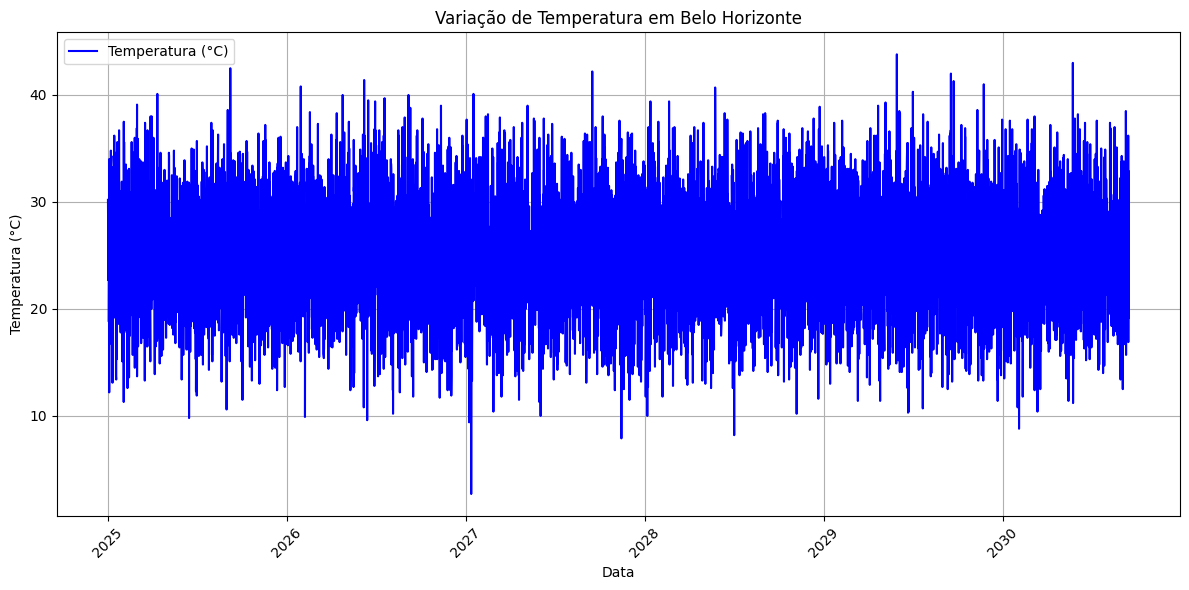

In [41]:
# Usando Matplotlib, crie um gráfico de linha com a variação de temperatura (temp_c) 
# ao longo do tempo para a cidade de Belo Horizonte
import matplotlib.pyplot as plt

# Filtrar os dados para a cidade de Belo Horizonte
df_bh = df_cidade[df_cidade["cidade"] == "Belo Horizonte"]
df_bh["time"] = pd.to_datetime(df_bh["time"])
df_bh = df_bh.sort_values(by="time")

plt.figure(figsize=(12, 6))
plt.plot(df_bh["time"], df_bh["temp_c"], label="Temperatura (°C)", color="blue")
plt.title("Variação de Temperatura em Belo Horizonte")
plt.xlabel("Data")
plt.ylabel("Temperatura (°C)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

 

In [42]:
# Converter a coluna 'time' para datetime, se ainda não foi feito
df_cidade["time"] = pd.to_datetime(df_cidade["time"])

# Filtrar registros do ano de 2030
df_2030 = df_cidade[df_cidade["time"].dt.year == 2030]

# Exibir quantos registros existem e, se quiser, as primeiras linhas
print(f"Quantidade de registros com data em 2030: {len(df_2030)}")
display(df_2030.head())

Quantidade de registros com data em 2030: 6176


,time,cidade,regiao,temp_c,feelslike_c,humidity,precip_mm,wind_kph,pressure_mb,uv,vis_km,condicao,is_day,date,delta_sensacao,visibilidade_classificada
43824,2030-01-01 00:00:00,Capanema,Sul,20.4,20.7,88,2.1,14.7,1033.5,1,9.7,Chuva leve,1,2030-01-01,0.3,Média
43825,2030-01-01 01:00:00,Belo Horizonte,Sul,22.3,27.0,63,0.7,8.8,1003.9,4,7.1,Parcialmente nublado,1,2030-01-01,4.7,Média
43826,2030-01-01 02:00:00,Porto Alegre,Norte,20.0,28.1,45,1.5,4.8,995.6,10,4.6,Tempestade,0,2030-01-01,8.1,Baixa
43827,2030-01-01 03:00:00,Capanema,Norte,23.1,29.2,90,0.8,6.7,1002.7,7,6.9,Parcialmente nublado,0,2030-01-01,6.1,Média
43828,2030-01-01 04:00:00,Capanema,Sul,27.6,23.1,64,1.5,12.0,1026.7,3,9.3,Tempestade,0,2030-01-01,-4.5,Média
